## Лабораторная работа "Введение в ML"

В этой лабораторной вы:

- познакомитесь с базовыми библиотеками для работы с табличными данными — `numpy` и `pandas`
- поближе посмотрите на простейшие задачи машинного обучения: классификацию и регрессию
- попробуете несколько метрик и поймёте, почему выбор метрики это важно
- обучите несколько простых моделей
- увидите связь между сложностью модели и переобучением
- убедитесь, что без данных всё тлен

Загрузка самых базовых библиотек:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

### [NumPy](https://numpy.org/doc/stable/user/index.html)

С 1995 numeric, с 2006 NumPy — «Numerical Python extensions» или просто «NumPy»

Возможности библиотеки NumPy:
* работать с многомерными массивами (таблицами)
* быстро вычислять математические функций на многомерных массивах

Ядро пакета NumPy — объект [ndarray](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html)

**Важные отличия** между NumPy arrays и Python sequences:
* NumPy array имеет фиксированную длину, которая определяется в момент его создания (в отличие от Python lists, которые могут расти динамически)
* Элементы в NumPy array должны быть одного типа
* Можно выполнять операции непосредственно над NumPy arrays

**Скорость** NumPy достигается с помощью:
* реализации на C
* векторизации и броадкастинга (broadcasting). Например, произведение массивов совместимых форм.

Теперь давайте разберёмся подробнее и сделаем что-нибудь приятное и полезное в `numpy`!

### Индексация

В NumPy работает привычная индексация Python, ура! Включая использование отрицательных индексов и срезов (slices)

<div class="alert alert-info">
<b>Замечание 1:</b> Индексы и срезы в многомерных массивах не нужно разделять квадратными скобками,
т.е. вместо <b>matrix[i][j]</b> нужно использовать <b>matrix[i, j]</b>. Первое тоже работает, но сначала выдаёт строку i, потом элемент j в ней.
</div>

<div class="alert alert-danger">
<b>Замечание 2:</b> Срезы в NumPy создают view, а не копии, как в случае срезов встроенных последовательностей Python (string, tuple and list).
</div>

_В библиотеке NumPy "view" представляет собой новый массив, который представляет собой ту же память, что и исходный массив, но с другой формой или представлением данных. Он обычно создается с использованием метода view() для массивов NumPy._
_Когда вы создаете представление (view) массива, вы создаете новый объект массива, который использует ту же память, что и исходный массив. Это означает, что изменения, внесенные в представление, также отражаются в исходном массиве и наоборот._

In [129]:
ones_matrix = np.ones((5, 5))
ones_submatrix_view = ones_matrix[::2,::2] # creates a view, not copy
ones_matrix[::2,::2] = np.zeros((3, 3))
ones_submatrix_view

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

### Ссылка на Яндекс.Контест

Решения и ответы в задачах, расположенных ниже, загружайте в контест на автоматическую проверку:
https://new.contest.yandex.ru/60376/start


**1.** Реализуйте функцию, принимающую на вход два одномерных массива `first_array` и `second_array` и возвращающую матрицу, в которой первый массив соответствует первому столбцу матрицы, второй — второму.

Вероятно первое, что приходит вам на ум, это конкатенация и транспонирование:

In [130]:
def construct_matrix(first_array, second_array):
    """
    Construct matrix from pair of arrays
    :param first_array: first array
    :param second_array: second array
    :return: constructed matrix
    """
    return np.vstack([first_array, second_array]).T # <- your first right code here

In [131]:
construct_matrix(np.array([1,2]),np.array([3,4]))

array([[1, 3],
       [2, 4]])

(в скобках заметим, что конкатенировать можно vertically, horizontally, depth wise методами vstack, hstack, dstack по трём осям (0, 1 и 2, соотвественно), либо в общем случае `np.concatenate` — поиграйтесь ниже с прекрасным примером четырёхмерной точки, чтобы точно всё для себя понять)

In [132]:
p = np.arange(1).reshape([1, 1, 1, 1])
p

array([[[[0]]]])

1. `np.vstack((p, p))` - это вызов функции `vstack()`, который вертикально стыкует два массива. В данном случае мы стыкуем массив `p` с самим собой. Поскольку `p` имеет форму `[1, 1, 1, 1]`, вертикальная стыковка двух таких массивов означает, что они будут объединены по первой оси. Так как `p` содержит только один элемент, результатом будет массив, содержащий два элемента, каждый с формой `[1, 1, 1, 1]`. Следовательно, форма полученного массива будет `[2, 1, 1, 1]`.
2. `np.hstack((p, p))` - это вызов функции `hstack()`, который горизонтально стыкует два массива. Поскольку массивы `p` имеют одинаковую форму `[1, 1, 1, 1]`, горизонтальное стыкование означает, что они будут объединены по последней оси. Это приводит к созданию массива с формой `[1, 2, 1, 1]`, так как мы добавляем один элемент к концу массива вдоль его второго измерения.
3. `np.dstack((p, p))` - это вызов функции `dstack()`, который стыкует два массива вдоль третьего измерения. Поскольку массивы `p` имеют форму `[1, 1, 1, 1]`, стыкование их вдоль третьего измерения создаст новый массив с формой `[1, 1, 2, 1]`, так как мы добавляем один элемент к концу массива вдоль его третьего измерения.

Таким образом, каждая из этих операций изменяет форму результирующего массива, основываясь на том, как происходит стыковка исходных массивов.

Давайте рассмотрим определения `shape` и `reshape` в контексте библиотеки NumPy.
1. **shape**:
   - `shape` - это атрибут массива в библиотеке NumPy, который представляет собой кортеж, содержащий размеры массива по каждой его оси. Например, если у вас есть двумерный массив размером 3x4, его `shape` будет (3, 4), что указывает на то, что у него 3 строки и 4 столбца. Для трехмерного массива его форма может быть, например, (2, 3, 4), что означает, что у него 2 матрицы, каждая из которых содержит 3 строки и 4 столбца.
2. **reshape**:
   - `reshape()` - это метод массива в NumPy, который используется для изменения формы массива без изменения его данных. Этот метод принимает новую форму в качестве аргумента и возвращает новый массив с этой формой. Например, если у вас есть одномерный массив с 12 элементами, вы можете использовать `reshape()` для преобразования его в двумерный массив размером 3x4 или 4x3. Этот метод позволяет вам изменять структуру массива, не изменяя его фактических данных.
   
   ```
   import numpy as np

   # Создаем одномерный массив с 12 элементами
   arr = np.arange(12)

   # Изменяем его форму на двумерный массив 3x4
   reshaped_arr = arr.reshape(3, 4)

   print(reshaped_arr)
   # Вывод:
   # [[ 0  1  2  3]
   #  [ 4  5  6  7]
   #  [ 8  9 10 11]]
   ```

In [133]:
print("vstack: ", np.vstack((p, p)).shape)
print("hstack: ", np.hstack((p, p)).shape)
print("dstack: ", np.dstack((p, p)).shape)

vstack:  (2, 1, 1, 1)
hstack:  (1, 2, 1, 1)
dstack:  (1, 1, 2, 1)


Этот код использует функцию concatenate() из библиотеки NumPy для объединения двух массивов вдоль указанной оси:

In [134]:
np.concatenate((p, p), axis=3).shape

(1, 1, 1, 2)

Но, поскольку операция транспонирования [делает массив non-contiguous](https://numpy.org/doc/stable/user/basics.copies.html#other-operations), мы в этой задаче **запретим** ей пользоваться и порекомедуем воспользоваться, например, методом [reshape](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html).

Массив "non-contiguous" (несвязный массив) в контексте библиотеки NumPy означает массив, данные в котором не хранятся в памяти в непрерывном блоке. В отличие от связных массивов, где элементы располагаются последовательно в памяти, элементы несвязного массива могут быть разбросаны по разным местам в памяти.

При создании массивов в NumPy они обычно создаются как связные, то есть данные хранятся в непрерывном блоке памяти. Это обеспечивает более эффективное использование памяти и ускоряет выполнение операций.

Однако в некоторых случаях, например, при выполнении определенных операций или при использовании представлений (views) массивов, массивы могут стать несвязными. Это может произойти, например, если вы создаете представление массива с использованием среза, который включает элементы не в последовательном порядке.

Несвязные массивы могут ухудшить производительность операций, так как доступ к данным может потребовать дополнительных шагов для обращения к разбросанным элементам. Однако они все еще остаются полезными в некоторых сценариях, и NumPy обеспечивает поддержку работы с ними.

In [135]:
def taskA(first_array, second_array):
    return np.hstack((first_array.reshape(len(first_array), 1), second_array.reshape(len(second_array), 1)))
print(taskA(np.array([1,2,3]), np.array([3,4,5])).flags)
print(taskA(np.array([1,2,3]), np.array([3,4,5])))

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False

[[1 3]
 [2 4]
 [3 5]]


**2.** Реализуйте функцию, принимающую на вход массив целых неотрицательных чисел `nums` и возвращающую самый частый элемент массива.

In [136]:
def most_frequent(nums):
    """
    Find the most frequent value in an array
    :param nums: array of ints
    :return: the most frequent value
    """
    # Используем bincount для подсчета частоты каждого элемента
    counts = np.bincount(nums)
    # Находим индекс наиболее часто встречающегося элемента
    most_index = np.argmax(counts)
    return most_index

# Пример использования функции
nums = np.array([1, 2, 3, 4, 2, 2, 3, 1, 1, 1])
most_common = most_frequent(nums)
print("Самый частый элемент:", most_common)

Самый частый элемент: 1


### Переходим к работе с данными

Прежде всего, загрузим данные и сделаем из них красивые pandas-таблички. Они взяты из параллели RecSys соревнования https://yandex.ru/cup/ml/. Но мы будем иметь дело не со всеми данными, а только с их частью. Данные у нас будут про заведения общественного питания (больше бюрократический терминологии!)

Файлы с данными можно найти [здесь](https://disk.yandex.ru/d/YWvCNRQMb7QSQA).

Задачей будет **предсказание среднего чека** (average_bill) по некоторым другим свойствам заведения.

In [2]:
base = '../1-introML/datasets/'

In [3]:
data = pd.read_csv(base + 'organisations.csv')
features = pd.read_csv(base + 'features.csv')
rubrics = pd.read_csv(base + 'rubrics.csv')

В основном мы будем работать с табличкой `data`; остальное вам может пригодиться, если вы захотите знать, какое содержание стоит за кодами признаков.

## Изучение данных

Посмотрите на данные. В этом вам поможет метод ``head`` pandas-таблички.

In [139]:
data.head()

,org_id,city,average_bill,rating,rubrics_id,features_id
0,15903868628669802651,msk,1500.0,4.270968,30776 30774,3501685156 3501779478 20422 3502045016 3502045...
1,16076540698036998306,msk,500.0,4.375000,30771,1509 1082283206 273469383 10462 11617 35017794...
2,8129364761615040323,msk,500.0,4.000000,31495,10462 11177 11617 11629 1416 1018 11704 11867 ...
3,15262729117594253452,msk,500.0,4.538813,30776 30770,3501618484 2020795524 11629 11617 1018 11704 2...
4,13418544315327784420,msk,500.0,4.409091,31495,11617 10462 11177 1416 11867 3501744275 20282 ...


Полезно посмотреть внимательнее на то, с какими признаками нам предстоит работать.

* **org_id** вам не понадобится;
* **city** - город, в котором находится заведение (``msk`` или ``spb``);
* **average_bill** - средний чек в заведении - он будет нашим таргетом;
* **rating** - рейтинг заведения;
* **rubrics_id** - тип заведения (или несколько типов). Соответствие кодов каким-то человекочитаемым типам живёт в табличке ``rubrics``
* **features_id** - набор неких фичей заведения. Соответствие кодов каким-то человекочитаемым типам живёт в табличке ``features``

Обратите внимание, что **rubrics_id** и **features_id** - это не списки, а разделённые пробелами строки. Когда вам захочется работать с отдельными фичами из мешка фичей для данного заведения, вам придётся всё-таки превратить их в списки (здесь поможет метод `split` для строк).

Чтобы быстро восстанавливать по рубрикам и фичам их нормальные названия, сделайте словари вида ``код_фичи:название_фичи``

In [5]:
features_dict = {}
for index, row in features.iterrows():
    feature_id = int(row['feature_id'])
    feature_name = row['feature_name']
    features_dict[feature_id] = feature_name

rubric_dict = {}
for index, row in rubrics.iterrows():
    rubric_id = int(row['rubric_id'])
    rubric_name = row['rubric_name']
    rubric_dict[rubric_id] = rubric_name

features_dict

{1: 'prepress_and_post_printing_processing',
 40: 'products',
 54: 'printing_method',
 77: 'fuel',
 79: 'shop',
 82: 'last_minute_deals_only',
 104: 'tour_type',
 110: 'audio_guide',
 111: 'cargo_transportation',
 113: 'manufacturing',
 114: 'installation',
 115: 'repairs',
 116: 'production',
 117: 'sale',
 133: 'music_genre',
 135: 'electroniccigarette',
 137: 'variety_food',
 140: 'room_disabled',
 175: 'arts',
 246: 'karaoke',
 249: 'street_theatre',
 253: 'performance',
 256: 'vip_zone',
 270: 'money_transfers',
 275: 'loans_private_individuals',
 282: 'sober_driver',
 288: 'accepted_credit_cards',
 305: 'refrigerator',
 308: 'minibar',
 312: 'room_number',
 328: 'speciality',
 337: 'type_of_rooms',
 344: 'building_repair',
 349: 'hospital_profile',
 354: 'type_parking',
 372: 'services_corporate_clients',
 379: 'currency_exchange',
 392: 'debit_cards',
 402: 'improving_driver_qualifications',
 405: 'female_instructor',
 409: 'medical_board',
 425: 'training_machines',
 427: 'targ

Посмотрим, какими бывают типы заведений:

In [5]:
rubric_dict

{30519: 'Булочная, пекарня',
 30770: 'Бар, паб',
 30771: 'Быстрое питание',
 30774: 'Кафе',
 30775: 'Пиццерия',
 30776: 'Ресторан',
 30777: 'Столовая',
 31286: 'Спортбар',
 31350: 'Кондитерская',
 31375: 'Суши-бар',
 31401: 'Кальян-бар',
 31495: 'Кофейня',
 3108292683: 'Бар безалкогольных напитков',
 3501514558: 'Фудкорт',
 3501750896: 'Кофе с собой'}

Мы что-то поняли про признаки, которыми нам предстоит пользоваться. Теперь время посмотреть на таргет. Вооружившись функциями ``hist`` и ``scatter`` из библиотеки ``matplotlib``, а также методом ``isna`` для pandas-таблиц разберитесь, какие значения принимают таргеты, есть ли там там выбросы, пропуски или ещё какие-то проблемы.

&nbsp;

<details>
  <summary>Когда будете готовы, кликните сюда, чтобы посмотреть ответ</summary>
    <ol>
      <li>Среди таргетов довольно много пропусков;</li>
      <li>Все таргеты - это числа, кратные 500;</li>
      <li>Есть какие-то адские значения, превышающие 100 000 (видимо, выбросы);</li>
      <li>В целом, число ресторанов с данным средним чеком быстро падает с ростом среднего чека. Для средних чеков, больших 2500, заведений уже совсем мало. Примерно у 2/3 заведений средний чек 500.</li>
    </ol>
</details>

1. **Histogram (Гистограмма)**:
   Функция `hist()` используется для построения гистограммы, которая представляет собой график, показывающий распределение частоты или вероятности наблюдений в заданном интервале значений. Гистограммы часто используются для визуализации распределения данных.

Пример использования:
```python
import matplotlib.pyplot as plt

data = [1, 2, 2, 3, 3, 3, 4, 4, 5, 5, 5, 5]
plt.hist(data, bins=5)
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.title('Пример гистограммы')
plt.show()
```

2. **Scatter Plot (Диаграмма рассеяния)**:
   Функция `scatter()` используется для создания диаграммы рассеяния, которая позволяет визуализировать взаимосвязь между двумя наборами данных. Каждая точка на диаграмме представляет собой одно наблюдение.

Пример использования:
```python
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]
plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Диаграмма рассеяния')
plt.show()
```

3. **isna() (Проверка на пропуски данных)**:
   Метод `isna()` используется для проверки наличия пропущенных значений (NaN) в данных. Возвращает булев массив, где `True` указывает на пропущенные значения.

Пример использования:
```python
import pandas as pd

data = {'A': [1, 2, None, 4, 5],
        'B': [None, 2, 3, 4, 5]}
df = pd.DataFrame(data)
print(df.isna())
```

`isna()` может быть полезным при предварительной обработке данных перед визуализацией, например, чтобы исключить строки с пропущенными значениями перед построением графиков.

Удалим выбросы, потому что иначе графики строятся криво

In [4]:
clean_data = data[(data.average_bill < 5000) & data.average_bill.notna()]

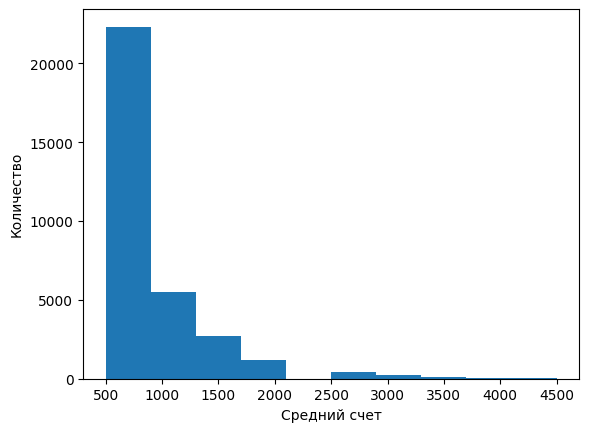

In [8]:
plt.hist(clean_data.average_bill)
plt.xlabel('Средний счет')
plt.ylabel('Количество')
plt.show()

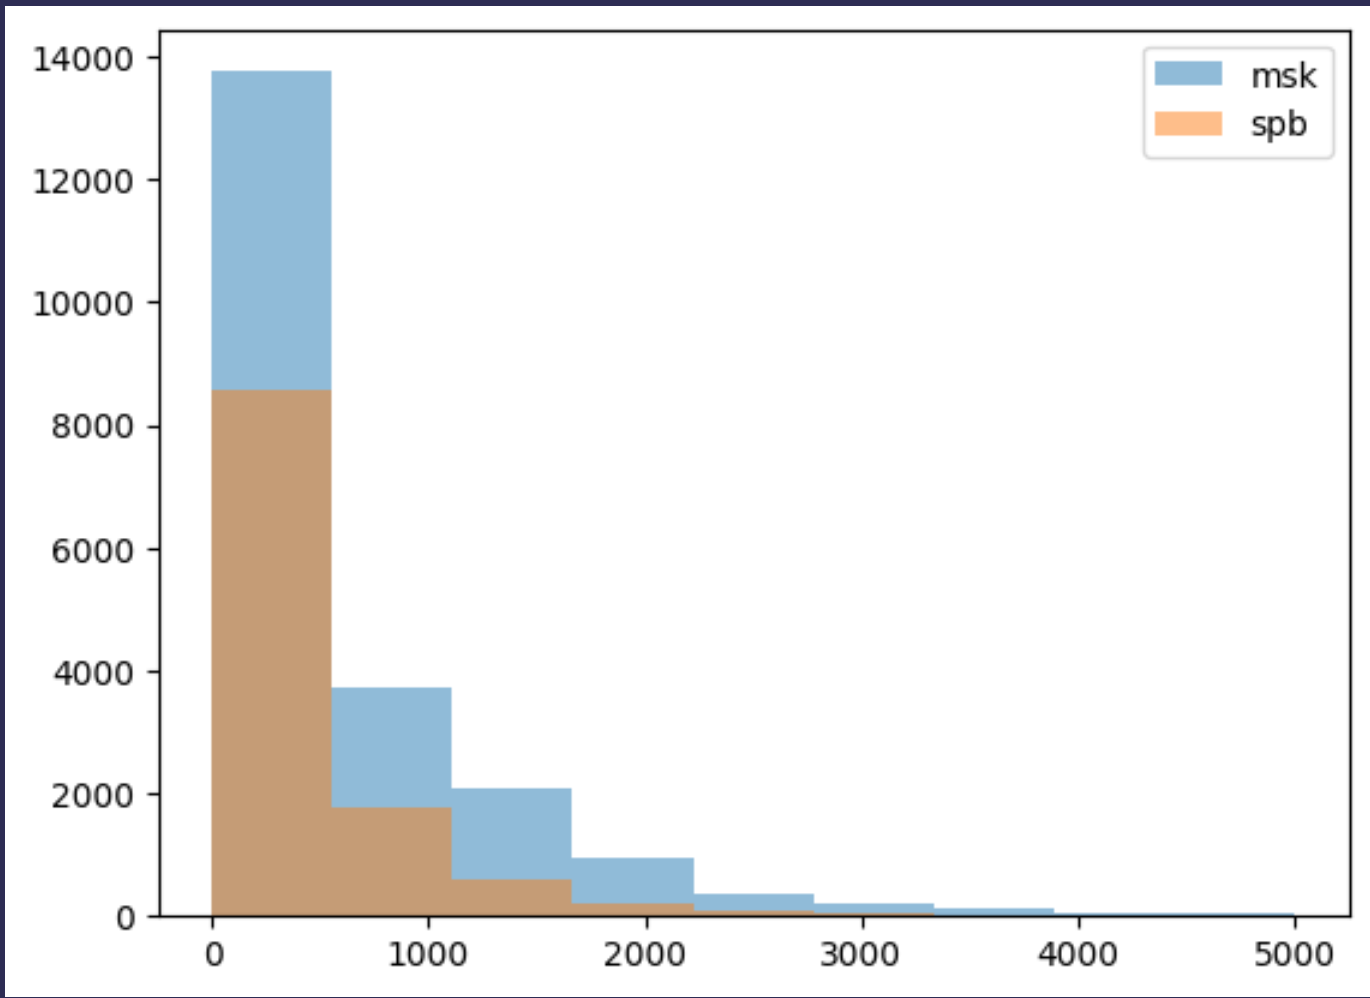

**Базовая очистка данных**

Раз есть треш, давайте чистить данные.

С пропусками можно бороться по-разному (даже и с пропусками в таргете), но пока мы сделаем самую простую вещь: дропнем все заведения, для которых мы не знаем средний чек.

Уберите из них все заведения, у которых средний чек неизвестен или превышает 2500. Пока есть опасение, что их слишком мало, чтобы мы смогли обучить на них что-нибудь.

**3. Введите в Контест количество заведений, которое у вас получилось после очистки**.

Дальше мы будем работать с очищенными данными.

In [5]:
clean2_data = data[(data.average_bill <= 2500) & data.average_bill.notna()]
len(clean2_data)

32136

**4. Посчитайте и введите в Контест разность между средними арифметическими average_bill в кафе Москвы и Санкт-Петербурга. Округлите ответ до целого.**

&nbsp;

<details>
  <summary>Небольшая подсказка</summary>
  Примените часто используемый метод groupby.
</details>

In [6]:
# Фильтрация данных для Москвы и Санкт-Петербурга по условию на наличие "30774" в rubrics_id
msk_data = clean2_data[(clean2_data.city == "msk") & (clean2_data['rubrics_id'].apply(lambda x: "30774" in x))]
spb_data = clean2_data[(clean2_data.city == "spb") & (clean2_data['rubrics_id'].apply(lambda x: "30774" in x))]

# Вычисление средних значений average_bill для каждого города
msk_average_bill_mean = msk_data.average_bill.mean()
spb_average_bill_mean = spb_data.average_bill.mean()

round(msk_average_bill_mean - spb_average_bill_mean)

142

Ну или можно так:

In [8]:
city_average_bill_mean = clean2_data[clean2_data['rubrics_id'].apply(lambda x: "30774" in x)].groupby(['city'])['average_bill'].mean()
msk_average_bill_mean = city_average_bill_mean['msk']
spb_average_bill_mean = city_average_bill_mean['spb']
round(msk_average_bill_mean - spb_average_bill_mean)

142

Давайте ещё немного поизучаем данные. Ответьте на вопросы:

1. Есть ли разница между средними чеками в Москве и Санкт-Петербурге?
2. Коррелирует ли средний чек с рейтингом?
3. Есть ли разница в среднем чеке между ресторанами и пабами (см. соответствующие типы из ``rubrics``)?

&nbsp;

<details>
  <summary>Когда будете готовы, кликните сюда, чтобы посмотреть ответ</summary>
    <ol>
      <li>В целом, да. Вы могли бы сравнить средние (в Москве больше) или медианы (они равны, потому что уж больно много где средний чек 500). Этого, конечно, мало для того, чтобы сделать вывод. Нужно проверять какие-то статические критерии, которые изучаются в курсе по статистике. Не будем останавливаться на этом подробно. Поскольку данные совсем не нормальные, никакой t-тест не сработает; мы бы предложили использовать критерий Манна-Уитни (см. википедию и функцию mannwhitneyu из библиотеки scipy.stats).</li>
      <li>Какая-то корреляция между ними есть но уж больно неубедительная (рекомендуем построим на одном графике boxplot рейтинга по каждому значению среднего чека для визуализации). Конечно, дна становится меньше с ростом среднего чека, но, видимо, в предсказании это особо не используешь;</li>
      <li>Несомненно, в ресторанах средний чек выше. Это и невооружённым глазом видно, и с помощью критерия Манна-Уитни можно проверить.</li>
    </ol>
</details>

## Формулируем задачу

Прежде, чем решать задачу, её надо сформулировать.

**Вопрос первый**: это классификация или регрессия? Подумайте над этим.

&nbsp;

<details>
  <summary>Когда будете готовы, кликните сюда, чтобы посмотреть ответ</summary>
    Ответ не столь однозначен, как хотелось бы. С одной стороны, таргет принимает всего четыре значения, и потому это может быть классификацией с 4 классами. С другой стороны, таргеты - это не абстрактные "треугольник", "круг", "квадрат", а вещественные числа, и когда мы вместо 500 предсказываем 2500, это явно хуже, чем вместо 1500 предсказать 2000. В целом, задачу можно решать и так, и так; мы будем смотреть на метрики обеих задач.
</details>

**Вопрос второй**: какие метрики мы будем использовать для оценки качества решения? Какие метрики вы предложили бы для этой задачи как для задачи классификации? А для этой задачи, как для задачи регрессии?

&nbsp;

<details>
  <summary>Когда будете готовы, кликните сюда, чтобы посмотреть ответ</summary>
  
    Начнём с классификации. Метрика accuracy не очень хороша из-за несбалансированности классов. Действительно, классификатор, который всегда говорит 500, будет иметь accuracy примерно 0.66, хотя это никак не отражает практическую ценность модели. Как мы увидим, самая большая проблема будет заключаться в том, чтобы научиться выделять заведения с большими чеками, а их меньше всего и в accuracy они вносят самый маленький вклад. Есть разные способы с этим бороться, один -- использовать sklearn.metrics.balanced_accuracy_score. Его идея, грубо говоря, в том, чтобы по каждому классу найти, какая доля объектов этого класса правильно классифицирована, а потом эти доли усреднить. Тогда у бессмысленного классификатора, который всем ставит 500, будет скор 1/5 (ведь классов 5), а чтобы получить прежние 2/3, нужно будет научиться в каждом классе правильно ставить хотя бы 2/3 меток.
    
    Теперь что касается регрессии. Основых метрики две - MSE и MAE. Из первой стоит извлекать корень, чтобы получать интерпретируемые человеком значения, а вторая менее агрессивна к выбросам (впрочем, выбросов тут уже нет, мы их все выкинули). Без дополнительной информации не очень понятно, какую выбирать, можно брать любую. А выбирать надо: ведь даже банальные модели "предсказывай всегда среднее" и "предсказывай всегда медиану" будут по-разному ранжироваться этими метриками.
</details>

**Вопрос третий**: а не взять ли нам какую-нибудь более экзотическую метрику? Например, MAPE (определение в учебнике в главе про оценку качества моделей). А как вам такое соображение: допустим, заказчик говорит, что пользователи будут расстраиваться, только если мы завысили средний чек - так давайте поправим MSE или MAE, обнуляя те слагаемые, для которых предсказанный таргет меньше истинного. Вот это хорошая метрика или нет?

&nbsp;

<details>
  <summary>Когда будете готовы, кликните сюда, чтобы посмотреть ответ</summary>
    
    Что касается MAPE, у нас нет тех проблем, с которой она борется. Вот если бы у нас были средние чеки от 500 до миллиона, мы бы столкнулись с ситуацией, что большие ошибки для больших чеков доминировали бы в сумме для MSE и MAE (500 вместо 1000 меркнет по сравнению с 500к вместо миллиона). Говоря поэтически, мы бы оптимизировали модель для миллионеров, забыв про простых трудяг. И было бы логично перейти от парадигмы "ошибаемся на 500 рублей" к парадигме "ошибаемся на 50%". Но у нас все таргеты примерно одного порядка, MAPE нам особо ни к чему.
    
    Вторая метрика коварна тем, что её можно "накрутить" безо всякой пользы для дела. А именно, модель, которая всегда предсказывает средний чек в миллион, была бы идеальна. Но все бы расстраивались и не ходили есть. Другое дело, что можно ввести разные веса для ошибок в большую и в меньшую сторону, но опять же - пока нет показаний к тому, что это нужно.
    
</details>

## Применяем ML

Теперь время разбить данные на обучающую и тестовую выборку. Делается это с помощью функции ``train_test_split`` из пакета ``sklearn``. При этом очень важно сделать две вещи:

* Зафиксировать ``random_state=42`` (да, именно этот, а то ваши модели могут не зайти в Контест), чтобы всё, что мы делаем, было воспроизводимо (иначе от перезапуска к перезапуску числа могут меняться, и мы не будем понимать, из-за чего это происходит).
* Сделать стратификацию по таргету. В противном случае у нас в трейне и тесте могут оказаться разные пропорции классов (обычно особенно страдают мало представленные классы), что неутешительно скажется на результате.

**Обратите внимание**, что если вы побьёте выборку на train и test по-другому, ваши результаты могут не зайти в контест.

In [14]:
clean_data_train, clean_data_test = train_test_split(
    clean2_data, stratify=clean2_data['average_bill'], test_size=0.33, random_state=42)

Теперь нам нужен **бейзлайн** - очень простая модель, с которой мы в дальнейшем будем сравниваться.

Поскольку мы ещё не знаем никаких умных классов моделей, все модели мы будем писать руками. А именно, мы напишем две простых модели на основе ``sklearn.baseRegressorMixin`` и ``sklearn.base.ClassifierMixin`` (посмотрите примеры в документации sklearn и сделайте так же):

* Модель для задачи регрессии, которая для всех заведений предсказывает одно число — среднее значение среднего чека;
* Модель для задачи классификации, которая для всех заведений предсказывает один класс — самый частый класс (ироничным образом он в данном случае совпадает с медианой).

**Важно!** Мы будем много раз повторять вам мантру о том, что **информация из тестовой выборки не должна протекать в процесс обучения**. Так вот, и среднее, и самый частый класс вы должны считать именно на обучающей выборке!

**5 и 6. Напишите эти две модели и сдайте в Контест**. В процессе проверки модели будут и обучаться, и предсказывать.

Заметим, что для этих моделей нам вообще не нужны какие-то "фичи"; мы работаем только с таргетом.

У каждой модели есть (как минимум) два метода: `fit` (обучает модель по фичам `X` и таргету `y`) `predict` (предсказывает по фичам `X`)

In [15]:
from sklearn.base import RegressorMixin

class MeanRegressor(RegressorMixin):
    def fit(self, X, y):
        self.mean_ = np.mean(y)
        self.is_fitted_ = True
        return self

    def predict(self, X):
        return np.full(shape=X.shape[0], fill_value=self.mean_)

from sklearn.base import ClassifierMixin
from scipy.stats import mode

class MostFrequentClassifier(ClassifierMixin):
    def fit(self, X, y):
        self.mode_ = mode(y)[0]
        self.is_fitted_ = True
        return self

    def predict(self, X):
        return np.full(shape=X.shape[0], fill_value=self.mode_)

Функция `mode` из модуля `scipy.stats` используется для вычисления моды (наиболее часто встречающегося значения) в массиве. Она возвращает кортеж, содержащий массив наиболее часто встречающихся значений и их частоты.

В нашем коде, `mode(y)` используется для вычисления моды целевой переменной `y`. Затем `[0]` используется для доступа к первому элементу кортежа, который представляет собой наиболее часто встречающееся значение (`mode`). Это значение сохраняется в атрибуте `self.mode_` для дальнейшего использования при предсказаниях.

Обучим наши модели

In [16]:
reg = MeanRegressor()
reg.fit(X=None, y=clean_data_train['average_bill'])

clf = MostFrequentClassifier()
clf.fit(X=None, y=clean_data_train['average_bill'])

Обучите модели и оцените их качество на тестовой выборке. В качестве метрик возьмём RMSE (``np.sqrt`` от ``sklearn.metrics.mean_squared_error``) и ``sklearn.metrics.balanced_accuracy_score``.

Для регрессионной модели имеет смысл считать только RMSE (значения будут не кратны 500, точно мы угадывать не будем никогда), а вот для классификационной можно найти обе метрики. Сделайте это. Какая модель оказалась лучше по RMSE?

<details>
  <summary>Когда будете готовы, кликните сюда</summary>
    
  Казалось бы, регрессор никогда не угадывает, но он в каком-то смысле лучше классификатора - справедливо ли это? Возможно. Несуществующий пользователь модели вряд ли будет задавать вопросы "почему средний чек не кратен 500?" Ну, выдали около 800 - ок, понятно.
    
</details>

In [17]:
from sklearn.metrics import mean_squared_error, balanced_accuracy_score

predictions_reg = reg.predict(clean_data_test)
predictions_clf = clf.predict(clean_data_test)
print(predictions_reg)
print(predictions_clf)

rmse_reg = np.sqrt(mean_squared_error(clean_data_test['average_bill'], predictions_reg))
print(f"RMSE для регрессионной модели (MeanRegressor): {rmse_reg}")

rmse_clf = np.sqrt(mean_squared_error(clean_data_test['average_bill'], predictions_clf))
balanced_accuracy = balanced_accuracy_score(clean_data_test['average_bill'], predictions_clf)
print(f"RMSE для классификационной модели (MostFrequentClassifier): {rmse_clf}")
print(f"Balanced accuracy score для классификационной модели (MostFrequentClassifier): {balanced_accuracy}")


[752.10162092 752.10162092 752.10162092 ... 752.10162092 752.10162092
 752.10162092]
[500. 500. 500. ... 500. 500. 500.]
RMSE для регрессионной модели (MeanRegressor): 448.7143889551622
RMSE для классификационной модели (MostFrequentClassifier): 514.7517402382093
Balanced accuracy score для классификационной модели (MostFrequentClassifier): 0.2


## Усложнение модели

Бейзлайны будут нашей отправной точкой. Строя дальнейшие модели, мы будем спрашивать себя: получилось ли лучше бейзлайна? Если нет или если не особо, то в чём смысл усложнения?

Начнём с использования фичи ``city``. Мы уже видели, что в разных городах и средние чеки разные. Легко проверить, что *медиана* средних чеков всё же одна и та же и в Москве, и в Санкт-Петербурге (ох уж этот вездесущий средний чек 500!), поэтому с классификатором мы ничего не сделаем. Но вот регрессор можно попробовать починить.

**7. Напишите регрессор, для каждого заведения предсказывающий среднее значение в том же городе (на обучающей выборке, конечно) и сдайте его в Контест**. Вам может помочь то, что булевы `pandas` и `numpy` столбцы можно умножать на численные — в такой ситуации False работает, как ноль, а True как единица.

In [18]:
from sklearn.base import RegressorMixin

class CityMeanRegressor(RegressorMixin):
    def __init__(self):
        self.city_mean_dict = None  # Словарь для хранения средних значений по городам

    def fit(self, X, y):
        # Создаем DataFrame на основе X и y для удобства обработки
        data = pd.DataFrame({'city': X['city'], 'average_bill': y})
        
        # Вычисляем средние значения average_bill для каждого города
        self.city_mean_dict = data.groupby('city')['average_bill'].mean().to_dict()
        return self

    def predict(self, X):
        # Предсказываем среднее значение по городу для каждого заведения
        predictions = [self.city_mean_dict[city] if city in self.city_mean_dict else 0 for city in X['city']]
        return np.array(predictions)

Давайте подробно объясним каждую часть кода класса `CityMeanRegressor`, который используется для предсказания среднего значения `average_bill` для каждого заведения в соответствии с его городом.

#### Конструктор (`__init__`):
```python
def __init__(self):
    self.city_mean_dict = None  # Словарь для хранения средних значений по городам
```
- В конструкторе мы инициализируем атрибут `city_mean_dict` как `None`. Этот атрибут будет использоваться для хранения средних значений `average_bill` для каждого города после обучения модели.

#### Метод `fit`:
```python
def fit(self, X, y):
    # Создаем DataFrame на основе X и y для удобства обработки
    data = pd.DataFrame({'city': X['city'], 'average_bill': y})
    
    # Вычисляем средние значения average_bill для каждого города
    self.city_mean_dict = data.groupby('city')['average_bill'].mean().to_dict()
    return self
```
- Метод `fit` принимает входные данные `X` (признаки) и `y` (целевые значения `average_bill`).
- Создаем новый объект `pandas.DataFrame` под названием `data`, который содержит столбец `city` из `X` и столбец `average_bill` из `y`. Это помогает нам связать каждое заведение (по городу) с его целевым значением `average_bill`.
- Используем метод `groupby` для вычисления средних значений `average_bill` для каждого уникального города. Затем преобразуем результат в словарь (`to_dict()`), где ключами будут названия городов, а значениями - их средние `average_bill`.
- Сохраняем этот словарь средних значений в атрибут `city_mean_dict` для дальнейшего использования при предсказании.

#### Метод `predict`:
```python
def predict(self, X):
    # Предсказываем среднее значение по городу для каждого заведения
    predictions = [self.city_mean_dict[city] if city in self.city_mean_dict else 0 for city in X['city']]
    return np.array(predictions)
```
- Метод `predict` принимает входные данные `X`, которые содержат информацию о заведениях (включая городы).
- Для каждого заведения в данных `X` мы используем словарь `city_mean_dict`, чтобы получить предсказанное среднее значение `average_bill` для соответствующего города. Если для какого-то города нет среднего значения (это может произойти, если город отсутствует в обучающих данных), мы предсказываем значение 0.
- Возвращаем предсказания в виде массива `numpy.array`, который содержит предсказанные средние значения `average_bill` для каждого заведения в `X`.

Таким образом, `CityMeanRegressor` обучается на данных `X` и `y`, вычисляет средние значения `average_bill` для каждого города в обучающих данных и предсказывает эти средние значения для новых данных `X`, основываясь на городах заведений.

Обучите регрессор и сравните его по метрике RMSE с бейзлайнами. Получилось ли улучшить метрику?

In [19]:
cityMeanReg = CityMeanRegressor()
cityMeanReg.fit(X=clean_data_train, y=clean_data_train['average_bill'])

predictions_cityMeanReg = cityMeanReg.predict(clean_data_test)
print("MeanRegressor", predictions_reg)
print("CityMeanRegressor", predictions_cityMeanReg)

rmse_cityMeanReg = np.sqrt(mean_squared_error(clean_data_test['average_bill'], predictions_cityMeanReg))
print(f"RMSE для регрессионной модели (MeanRegressor): {rmse_reg}")
print(f"RMSE для регрессионной модели (CityMeanRegressor): {rmse_cityMeanReg}")

MeanRegressor [752.10162092 752.10162092 752.10162092 ... 752.10162092 752.10162092
 752.10162092]
CityMeanRegressor [677.71044658 792.61119082 792.61119082 ... 792.61119082 792.61119082
 677.71044658]
RMSE для регрессионной модели (MeanRegressor): 448.7143889551622
RMSE для регрессионной модели (CityMeanRegressor): 445.1063281403263


Лучше стало, но, правда, не очень сильно. В этот момент очень важно не просто радовать руководителя приростом в третьем знаке, но и думать о том, что происходит.

Средний средний чек по Москве равен 793, в Санкт-Петербурге - 676, а в целом - 752 рубля. MSE, увы, не поможет вам ответить на вопрос, стало ли лучше пользователю, если вы ему вместо 752 рублей назвали 793. Здесь вскрывается весьма существенный порок MSE в этой задаче. Дело в том, что наш изначальный таргет делит заведения на некоторые "ценовые категории", и различие в средних чеках 500 и 1000 в самом деле существенно. Наверное, мы хотели бы как раз правильно предсказывать ценовые категории. Но MSE не очень помогает нам об этом судить. Дальше мы ещё подумаем, как это исправить.

В любом случае, несмотря на улучшение метрики, мы пока не можем судить, стало ли по жизни лучше от усложнения модели.

Поручинившись немного, возьмём на вооружение другую идею. Давайте использовать типы заведений!

Но с типами есть некоторая проблема: в столбце ``rubrics_id`` не всегда один идентификатор, часто их несколько, и всего комбинаций довольно много. Чтобы не возиться с малочисленными типами, давайте сольём их в один безликий ``other``.

Итак, добавьте в обучающие и тестовые данные столбец ``modified_rubrics``, в котором будет то же, что и в ``rubrics_id``, если соответствующая комбинация рубрик содержит хотя бы 100 заведений из обучающей (!) выборки, и строка ``other`` в противном случае.

Здесь вам поможет контейнер ``Counter`` из библиотеки ``collections``.

In [20]:
from collections import Counter

def modify_rubrics(data):
    # Подсчитываем количество заведений для каждой комбинации rubrics_id
    rubrics_counter = Counter(data['rubrics_id'])

    # Создаем словарь для отображения rubrics_id в modified_rubrics
    modified_rubrics_dict = {}
    for rubrics_id, count in rubrics_counter.items():
        if count >= 100:  # Если комбинация встречается более 100 раз, оставляем ее как есть
            modified_rubrics_dict[rubrics_id] = rubrics_id
        else:  # Иначе заменяем на 'other'
            modified_rubrics_dict[rubrics_id] = 'other'

    # Создаем новый столбец modified_rubrics в DataFrame
    data['modified_rubrics'] = data['rubrics_id'].map(modified_rubrics_dict)

# Применяем функцию к обучающим данным и тестовым данным
clean_data_train_with_other = clean_data_train.copy()
clean_data_test_with_other = clean_data_test.copy()
modify_rubrics(clean_data_train_with_other)
modify_rubrics(clean_data_test_with_other)

clean_data_train_with_other.head(20)

,org_id,city,average_bill,rating,rubrics_id,features_id,modified_rubrics
45769,3276960721840719260,msk,500.0,4.500000,30770,11704 20422 1018 11177 1416 11867 10462,30770
39061,8452997364765928283,msk,1500.0,4.442623,30774 30776,1415 3501481355 1416 11629 10462 1524 20422 11...,30774 30776
59281,14240408259222214074,spb,1000.0,4.018868,30776 30774,3502045032 11741 3502045016 10462 11704 350177...,30776 30774
51225,15114069072602161053,msk,1500.0,4.364742,31401 30776,3501513153 3501779478 3491142672 273469383 350...,other
29587,2730337118800634815,msk,1000.0,4.698718,30770,21247 10896 3491142672 11629 3501481353 350148...,30770
46706,16990118229778698146,msk,500.0,4.750000,30774,273469383 20422 1018 11867 1416 10462 11704,30774
49388,15328432697243413588,spb,2500.0,4.291262,30770 30776,21247 20424 11629 11867 2020795524 11177 10822...,30770 30776
53589,6311296738926960771,msk,500.0,3.666667,30771,20422 10462 3501749289 1416 11704 20424 273469...,30771
58056,13302179954888852449,msk,500.0,4.500000,30770,20305 1416 3501618484 11177 1082283206 11629 1...,30770
37036,2288802948136770304,spb,500.0,4.371875,31350,3501754799 3502045032 3502010932 20422 3502010...,31350


Теперь настало время написать могучий классификатор, который по заведению предсказывает медиану средних чеков среди тех в обучающей выборке, у которых с ним одинаковые `modified_rubrics` и город (вы спросите, почему медиану, а не самый частый -- спишем это на вдохновение; самый частый тоже можно брать - но медиана работает лучше).

**8. Напишите классификатор и сдайте в Контест**.

In [21]:
class RubricCityMedianClassifier(ClassifierMixin):
    def __init__(self):
        self.city_median_dict = None  # Словарь для хранения медиан средних чеков по комбинации modified_rubrics и city

    def fit(self, X, y):
        # Создаем DataFrame на основе X и y для удобства обработки
        data = pd.DataFrame({'modified_rubrics': X['modified_rubrics'], 'city': X['city'], 'average_bill': y})
        
        # Вычисляем медианы средних чеков для каждой комбинации modified_rubrics и city
        self.city_median_dict = data.groupby(['modified_rubrics', 'city'])['average_bill'].median().to_dict()
        return self

    def predict(self, X):
        # Предсказываем медиану среднего чека по комбинации modified_rubrics и city для каждого заведения
        predictions = []
        for idx, row in X.iterrows():
            key = (row['modified_rubrics'], row['city'])
            if key in self.city_median_dict:
                predictions.append(self.city_median_dict[key])
            else:
                # Если для данной комбинации нет данных, можно вернуть общую медиану или другое значение по умолчанию
                predictions.append(np.median(list(self.city_median_dict.values())))
        return np.array(predictions)

Сравните обученный классификатор по метрикам RMSE и balanced_accuracy_score с нашими бейзлайнами. Получилось ли улучшить?

In [22]:
rubricCityMedianCls = RubricCityMedianClassifier()
rubricCityMedianCls.fit(X=clean_data_train_with_other, y=clean_data_train_with_other['average_bill'])

predictions_rubricCityMedianCls = rubricCityMedianCls.predict(clean_data_test_with_other)
print("CityMedianClassifier", predictions_rubricCityMedianCls)

rmse_rubricCityMedianCls = np.sqrt(mean_squared_error(clean_data_test_with_other['average_bill'], predictions_rubricCityMedianCls))
print(f"RMSE для регрессионной модели (RubricCityMedianClassifier): {rmse_rubricCityMedianCls}")

CityMedianClassifier [ 500.  500.  500. ... 1500.  500.  500.]
RMSE для регрессионной модели (RubricCityMedianClassifier): 394.7438728209164


Обратите внимание что рост accuracy по сравнению с бейзлайном при этом на порядок меньше:

accuracy_score

Predict most frequent:  0.6947666195190948

Predict by rubric and city:  0.7095709570957096

Для диагностики напечатайте для каждого класса тестовой выборки, сколько в нём объектов и скольким из них наш классификатор приписал правильный класс. Что вы видите?


In [23]:
from collections import defaultdict

# Создаем словарь для подсчета количества верных предсказаний по классам
class_counts = defaultdict(int)  # Для подсчета количества объектов каждого класса
correct_predictions = defaultdict(int)  # Для подсчета верных предсказаний по классам

# Проходим по каждой строке тестовой выборки
for true_class, predicted_class in zip(clean_data_test_with_other['average_bill'], predictions_rubricCityMedianCls):
    # Увеличиваем счетчик объектов для истинного класса
    class_counts[true_class] += 1

    # Если предсказанный класс совпадает с истинным, увеличиваем счетчик верных предсказаний для этого класса
    if predicted_class == true_class:
        correct_predictions[true_class] += 1

# Выводим результаты
for class_label in class_counts:
    accuracy = correct_predictions[class_label] / class_counts[class_label]
    print(f"Class: {class_label}, Objects: {class_counts[class_label]}, Correct Predictions: {correct_predictions[class_label]}, Accuracy: {accuracy:.2f}")


Class: 1000.0, Objects: 1809, Correct Predictions: 688, Accuracy: 0.38
Class: 500.0, Objects: 7368, Correct Predictions: 6621, Accuracy: 0.90
Class: 2000.0, Objects: 391, Correct Predictions: 0, Accuracy: 0.00
Class: 1500.0, Objects: 890, Correct Predictions: 217, Accuracy: 0.24
Class: 2500.0, Objects: 147, Correct Predictions: 0, Accuracy: 0.00



&nbsp;

<details>
  <summary>Когда будете готовы, кликните сюда, чтобы посмотреть ответ</summary>
    
  Вы, вероятно, видите то, что мы стали однозначно лучше по сравнению с бейзлайном детектировать средний чек 1000 и 1500 (хотя всё равно не очень хорошо + ценой ухудшения качества на среднем чеке 500), а вот чеки 2000 и 2500 нам ну никак не даются.
    
</details>

**Кстати**. А вы понимаете, почему приведённый выше пайплайн классификации был не очень удачным с точки зрения архитектуры? Почему его было бы правильнее воплотить по-другому?

&nbsp;

<details>
  <summary>Когда будете готовы, кликните сюда, чтобы посмотреть ответ</summary>
Собственно говоря, и не было никакого пайплайна. К счастью, у нас была одна обучающая выборка, мы на ней посчитали список рубрик для modified_rubrics и радовались жизни. Но если бы нам надо было переобучать всё на новых данных, пришлось бы помнить, что их надо везде пересчитать (ведь у нас могли появиться новые рубрики с хотя бы 100 представителями). А уж никакую кросс-валидацию (кто знает - тот поймёт) с нашим подходом к делу и вовсе бы не получилось сделать без боли.
    
Поэтому в следующей лабораторной вы научитесь делать честные пайплайны, в которых преобразование данных, генерация фичей и обучение классификатора будут объединены в один понятный процесс, происходящий на этапе fit.
</details>

## Слишком простые и слишком сложные модели

Бейзлайны у нас слишком просты и потому не очень полезны в жизни. Но если сложность модели растёт бесконтрольно, то тоже получается плохо.

Давайте рассмотрим конкретный пример. Создадим классификатор, использующий одновременно `rubrics_id` и `features_id`.

Сделайте следующее:

- для каждого объекта обучающей выборки сконкатенируйте строку `rubrics_id` с разделителем (например, буквой 'q') и содержимым `features_id`. Полученный столбец озаглавьте `modified_features`. Это не самый клёвый способ заиспользовать все фичи, но сейчас пока сойдёт. Причём на сей раз не будем выкидывать мало представленные значения (вся информация важна, не так ли?).
- при этом для тестовой выборке заменяйте на строку `other` все конкатенации, которые не встретились в обучающей выборке.

То есть элементы в этом столбце будут иметь вид `other` или `30776 30774 q 3502045032 11741 3502045016 1046...`.

In [24]:
# Создание столбца modified_features для обучающих данных
clean_data_train['modified_features'] = clean_data_train['rubrics_id'].astype(str) + ' q ' + clean_data_train['features_id'].astype(str)

# Создание столбца modified_features для тестовых данных и замена непредставленных значений на 'other'
test_modified_features = clean_data_test['rubrics_id'].astype(str) + ' q ' + clean_data_test['features_id'].astype(str)
train_modified_features_set = set(clean_data_train['modified_features'])

clean_data_test['modified_features'] = test_modified_features.apply(lambda x: x if x in train_modified_features_set else 'other')

# Вывод первых нескольких строк для проверки
print(clean_data_test[['modified_features']].head(10))

              modified_features
65841                     other
48882                     other
33711                     other
33544                     other
35293                     other
13992                     other
40502                     other
28701  30774 30771 q 1416 10462
1650                      other
17302                     other


Теперь обучите классификатор, который для заведения предсказывает медиану среднего чека по всем объектам тестовой выборки с таким же, как у него, значением `modified_features`, а если такого в обучающей выборке нет, то глобальную медиану среднего чека по всей обучающей выборке.


In [25]:
from tqdm import tqdm

class ModifiedFeaturesMedianClassifier:
    def __init__(self):
        self.global_median = None
        self.feature_medians = {}

    def fit(self, X_train, y_train):
        # Вычисляем глобальную медиану среднего чека по всей обучающей выборке
        self.global_median = np.median(y_train)
        
        # Вычисляем медианы среднего чека для каждого значения modified_features
        modified_features_counter = Counter(X_train['modified_features'])
        for feature_value, count in modified_features_counter.items():
            median_value = np.median(y_train[X_train['modified_features'] == feature_value])
            self.feature_medians[feature_value] = median_value

    def predict(self, X_test):
        predictions = []
        # Проходимся по тестовой выборке с отслеживанием прогресса
        for index, row in tqdm(X_test.iterrows(), total=len(X_test)):
            feature_value = row['modified_features']
            if feature_value in self.feature_medians:
                # Используем медиану для соответствующего значения modified_features
                predictions.append(self.feature_medians[feature_value])
            else:
                # Если такого значения нет, используем глобальную медиану
                predictions.append(self.global_median)
        return np.array(predictions)

Давайте рассмотрим, почему мы используем `X_train = clean_data_train[['modified_features']]` и как это соотносится с последующим обращением к столбцу `'modified_features'`.

1. **Использование `X_train = clean_data_train[['modified_features']]`**:
   - В этой строке мы создаем новый DataFrame `X_train`, который содержит только один столбец `'modified_features'` из исходного `clean_data_train`. При использовании двойных скобок `[['modified_features']]` мы создаем DataFrame, а не Series.
   - Такой подход полезен, когда в `X_train` требуется хранить несколько признаков (несколько столбцов), даже если на данный момент мы используем только один столбец.

2. **Обращение к столбцу `'modified_features'` внутри `fit` метода**:
   - При обращении к столбцу `'modified_features'` внутри метода `fit`, мы используем `X_train['modified_features']`. Здесь `X_train` — это DataFrame, а `X_train['modified_features']` — это Series, которая содержит значения столбца `'modified_features'`.
   - Это позволяет нам работать с конкретным столбцом признаков внутри метода `fit`, где нам нужно вычислить медианы для различных значений `'modified_features'`.

3. **Итоговый подход**:
   - Хотя мы начинаем с создания DataFrame `X_train` с помощью `X_train = clean_data_train[['modified_features']]`, мы затем используем `X_train['modified_features']` для доступа к значениям столбца `'modified_features'` внутри метода `fit`. Это позволяет нам эффективно работать с нужными данными при обучении классификатора.

Таким образом, использование DataFrame для `X_train` дает нам гибкость для работы с различными признаками в рамках метода `fit`, даже если на самом деле мы работаем только с одним столбцом признаков в конкретной ситуации.

In [26]:
clean_data_train[['modified_features']]['modified_features']

45769      30770 q 11704 20422 1018 11177 1416 11867 10462
39061    30774 30776 q 1415 3501481355 1416 11629 10462...
59281    30776 30774 q 3502045032 11741 3502045016 1046...
51225    31401 30776 q 3501513153 3501779478 3491142672...
29587    30770 q 21247 10896 3491142672 11629 350148135...
                               ...                        
64667    30771 q 20424 3501744275 273469383 10462 11177...
47309    30771 q 273469383 20424 11704 11629 10462 2042...
26208    30775 q 21247 11867 11629 1524 1509 20422 1416...
48599    31495 30774 q 3491142672 20282 3501637468 1174...
17863    30774 q 3501744275 11617 3502045032 3502045016...
Name: modified_features, Length: 21531, dtype: object

1. `X_train = clean_data_train[['modified_features']]`:
   - В этом случае `[['modified_features']]` создает новый DataFrame, содержащий только один столбец `'modified_features'` из DataFrame `clean_data_train`.
   - Результат будет DataFrame с одним столбцом, поэтому это эквивалентно `X_train` с формой `(n_samples, 1)`, где `n_samples` - количество строк в исходном `clean_data_train`.
   - Важно отметить, что здесь двойные квадратные скобки `[['modified_features']]` используются для указания списка столбцов для выбора. Это гарантирует, что результатом будет DataFrame, даже если в списке только один столбец.

2. `X_train = clean_data_train['modified_features']`:
   - В этом случае `'modified_features'` обращается к столбцу `'modified_features'` в DataFrame `clean_data_train`.
   - Результатом будет Series (последовательность данных), содержащая значения столбца `'modified_features'`.
   - Форма `X_train` будет `(n_samples,)`, что означает, что это одномерный массив (Series), а не двумерный DataFrame.

Таким образом, основное различие заключается в типе данных, возвращаемом операцией индексации:

- `clean_data_train[['modified_features']]` возвращает DataFrame с одним столбцом.
- `clean_data_train['modified_features']` возвращает Series (одномерный массив) со значениями столбца.

При использовании для обучения модели машинного обучения преобразованные данные (например, `X_train = clean_data_train[['modified_features']]`) предпочтительнее, поскольку модели обычно ожидают получить двумерный массив (DataFrame) в качестве входных данных. Однако это также зависит от библиотеки машинного обучения, с которой вы работаете, и ее требований к формату входных данных.

In [27]:
clean_data_train[['modified_features']]

,modified_features
45769,30770 q 11704 20422 1018 11177 1416 11867 10462
39061,30774 30776 q 1415 3501481355 1416 11629 10462...
59281,30776 30774 q 3502045032 11741 3502045016 1046...
51225,31401 30776 q 3501513153 3501779478 3491142672...
29587,30770 q 21247 10896 3491142672 11629 350148135...
...,...
64667,30771 q 20424 3501744275 273469383 10462 11177...
47309,30771 q 273469383 20424 11704 11629 10462 2042...
26208,30775 q 21247 11867 11629 1524 1509 20422 1416...
48599,31495 30774 q 3491142672 20282 3501637468 1174...


In [28]:
clean_data_train['modified_features']

45769      30770 q 11704 20422 1018 11177 1416 11867 10462
39061    30774 30776 q 1415 3501481355 1416 11629 10462...
59281    30776 30774 q 3502045032 11741 3502045016 1046...
51225    31401 30776 q 3501513153 3501779478 3491142672...
29587    30770 q 21247 10896 3491142672 11629 350148135...
                               ...                        
64667    30771 q 20424 3501744275 273469383 10462 11177...
47309    30771 q 273469383 20424 11704 11629 10462 2042...
26208    30775 q 21247 11867 11629 1524 1509 20422 1416...
48599    31495 30774 q 3491142672 20282 3501637468 1174...
17863    30774 q 3501744275 11617 3502045032 3502045016...
Name: modified_features, Length: 21531, dtype: object

Основное различие между `X_train` и `y_train` заключается в их структуре данных:

1. **X_train (признаки для обучения)**:
   - `X_train` представляет собой матрицу признаков, где каждый столбец соответствует отдельному признаку, а каждая строка представляет собой отдельный объект или наблюдение.
   - В каждой ячейке этой матрицы могут находиться одно или несколько значений (например, в вашем случае, в столбце `modified_features` могут содержаться различные комбинации значений рубрик и характеристик).

2. **y_train (целевая переменная для обучения)**:
   - `y_train` представляет собой одномерный массив (Series), где каждый элемент соответствует целевой переменной или метке для соответствующего объекта в `X_train`.
   - Каждый элемент в `y_train` содержит только одно значение (например, средний чек `average_bill` для соответствующего заведения).

Поэтому, когда вы передаете `X_train` как DataFrame и `y_train` как Series в метод `fit` вашего классификатора, вы сообщаете модели, как интерпретировать ваши данные: `X_train` содержит набор признаков для каждого объекта, а `y_train` содержит целевую переменную, которую модель пытается предсказать на основе этих признаков.

In [29]:
# Используем обучающие данные clean_data_train для обучения классификатора
X_train = clean_data_train[['modified_features']]
y_train = clean_data_train['average_bill']

# Создаем и обучаем классификатор
medianClassifier = ModifiedFeaturesMedianClassifier()
medianClassifier.fit(X_train, y_train)

# Предсказываем средние чеки для тестовых данных clean_data_test
X_test = clean_data_test[['modified_features']]
predictions_medianClassifier = medianClassifier.predict(X_test)

# Выводим предсказания и вычисляем RMSE
print("Predictions:", predictions_medianClassifier)

rmse_medianClassifier = np.sqrt(mean_squared_error(clean_data_test['average_bill'], predictions_medianClassifier))
print(f"RMSE для классификатора (ModifiedFeaturesMedianClassifier): {rmse_medianClassifier}")

100%|██████████| 10605/10605 [00:00<00:00, 16817.39it/s]

Predictions: [500. 500. 500. ... 500. 500. 500.]
RMSE для классификатора (ModifiedFeaturesMedianClassifier): 513.9898108867789



**9. Загрузите в Контест предсказания этого классификатора на тестовой выборке**

Мы ждём файла **.csv**, у которого в каждой строке будет только одно число - предсказание классификатора.

Возможно, вам будет полезна библиотека ``tqdm``, позволяющая отслеживать в реальном времени, сколько времени уже крутится цикл и сколько итераций ещё осталось. Впрочем, если вы всё написали нормально, то должно работать не очень долго.

In [30]:
# Преобразуем предсказания в целые числа
predictions_int = [int(prediction) for prediction in predictions_medianClassifier]

# Создаем DataFrame для предсказаний с идентификаторами заведений
output_df = pd.DataFrame({
    'establishment_id': clean_data_test.index,
    'prediction': predictions_int
})

# Сохраняем предсказания в CSV-файл
output_df.to_csv('taskI.csv', index=False, header=False) #header=False чтобы не было заголовков в .csv файле (в условии задачи так попросили)

Модель, очевидно, очень сложная. Число параметров (различных категорий) в ней сопоставимо с числом объектов в обучающей выборке. А получилось ли хорошо?

Давайте посчитаем RMSE и balanced_accuracy_score на обучающей и на тестовой выборках.

**10. Введите их в Контест**

In [47]:
# Обучающая выборка
y_train_true = clean_data_train['average_bill']
y_train_pred = medianClassifier.predict(X_train)

# Тестовая выборка
y_test_true = clean_data_test['average_bill']
y_test_pred = medianClassifier.predict(X_test)

100%|██████████| 10605/10605 [00:02<00:00, 3888.64it/s]


В дальнейшем при получении метрик мы получим:
```
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:2458: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:2458: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
```  
У нас возникают проблемы с несоответствием классов в предсказаниях модели и истинных метках. Для решения этой проблемы вам нужно убедиться, что классы в предсказаниях модели соответствуют классам в истинных метках. Вот что мы можем предпринять - проверка уникальных классов в истинных метках и предсказаниях модели:

In [48]:
# Проверка уникальных классов в истинных метках обучающей выборки
print("Уникальные классы в y_train_true:", np.unique(y_train_true))

# Проверка уникальных классов в предсказаниях модели для обучающей выборки
print("Уникальные классы в y_train_pred:", np.unique(y_train_pred))

# Проверка уникальных классов в истинных метках тестовой выборки
print("Уникальные классы в y_test_true:", np.unique(y_test_true))

# Проверка уникальных классов в предсказаниях модели для тестовой выборки
print("Уникальные классы в y_test_pred:", np.unique(y_test_pred))


Уникальные классы в y_train_true: [ 500. 1000. 1500. 2000. 2500.]
Уникальные классы в y_train_pred: [ 500.  750. 1000. 1250. 1500. 1750. 2000. 2500.]
Уникальные классы в y_test_true: [ 500. 1000. 1500. 2000. 2500.]
Уникальные классы в y_test_pred: [ 500.  750. 1000. 1250. 1500. 2000.]


Из вывода уникальных классов видно, что предсказания модели содержат дополнительные классы, которых нет в истинных метках. Например, в y_train_pred присутствуют классы 750, 1250 и 1750, а в y_test_pred — классы 750 и 1250, которых нет среди истинных меток (y_train_true и y_test_true).

Можно использовать округление или другие методы для приведения предсказанных значений к ближайшим допустимым классам. Например:

In [49]:
# Округление предсказанных значений до ближайшего допустимого класса
y_train_pred_rounded = np.round(y_train_pred / 500) * 500
y_test_pred_rounded = np.round(y_test_pred / 500) * 500

In [51]:
# Проверка уникальных классов в истинных метках обучающей выборки
print("Уникальные классы в y_train_true:", np.unique(y_train_true))

# Проверка уникальных классов в предсказаниях модели для обучающей выборки
print("Уникальные классы в y_train_pred:", np.unique(y_train_pred_rounded))

# Проверка уникальных классов в истинных метках тестовой выборки
print("Уникальные классы в y_test_true:", np.unique(y_test_true))

# Проверка уникальных классов в предсказаниях модели для тестовой выборки
print("Уникальные классы в y_test_pred:", np.unique(y_test_pred_rounded))


Уникальные классы в y_train_true: [ 500. 1000. 1500. 2000. 2500.]
Уникальные классы в y_train_pred: [ 500. 1000. 1500. 2000. 2500.]
Уникальные классы в y_test_true: [ 500. 1000. 1500. 2000. 2500.]
Уникальные классы в y_test_pred: [ 500. 1000. 1500. 2000.]


Но y_train_pred_rounded и y_test_pred_rounded мы использовать не будем, так как не пройдем контест 

In [54]:
# RMSE на обучающей выборке
rmse_train = np.sqrt(mean_squared_error(y_train_true, y_train_pred))
print(f"RMSE для обучающей выборки: {rmse_train}")

# RMSE на тестовой выборке
rmse_test = np.sqrt(mean_squared_error(y_test_true, y_test_pred))
print(f"RMSE для тестовой выборки: {rmse_test}")

# Balanced Accuracy на обучающей выборке (пример)
balanced_accuracy_train = balanced_accuracy_score(y_train_true, y_train_pred)
print(f"Balanced Accuracy для обучающей выборки: {balanced_accuracy_train}")

# Balanced Accuracy на тестовой выборке (пример)
balanced_accuracy_test = balanced_accuracy_score(y_test_true, y_test_pred)
print(f"Balanced Accuracy для тестовой выборки: {balanced_accuracy_test}")


RMSE для обучающей выборки: 32.4162067388783
RMSE для тестовой выборки: 513.9898108867789
Balanced Accuracy для обучающей выборки: 0.9931928777769354
Balanced Accuracy для тестовой выборки: 0.2010249213051401


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:2458: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:2458: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Налицо переобучение: на трейне метрики отличные, на тесте - вообще никакие

В общем, не гонитесь за чрезмерной сложностью модели..

## ML без данных что компутер без электричества

Возможно, вы смотрите на полученные выше результаты и думаете: вот если бы мы не какие-то убогие медианы предсказывали, а гоняли бы нейросети, то тут-то бы всё и получилось!

Но, увы, совсем даже не всегда от счастья нас отделяет выбор хорошей модели (и стратегии обучения). Если данные не очень, то даже самая крутая модель не сработает. В этой ситуации нужно либо добывать новые фичи каким-то образом, либо собирать новые данные (увеличивать датасет), либо просто бросать задачу.

Давайте посмотрим, что выжмет из наших данных одна из самых мощных моделей для табличных данных - градиентный бустинг на решающих деревьях в исполнении [CatBoost](https://catboost.ai/).

Но прежде, чем сделать fit, нам надо облагородить данные. Несмотря на то, что CatBoost отлично работает с категориальными фичами, мешок признаков из `rubrics_id` или `features_id` может ему оказаться не по зубам. Поэтому мы соберём датасет в пристойную матрицу, создав для каждого типа рубрик и фичей отдельный столбец и записав там единицы для тех объектов, у которых эта рубрика или фича имеет место.

В матрице почти все элементы будут нулями. Такие матрицы считаются **разреженными** и их можно хранить гораздо эффективней, чем просто таблицей. Этим и займёмся)

Есть несколько форматов хранения разреженных матриц (многие из них реализованы в [пакете sparse библиотеки scipy](https://docs.scipy.org/doc/scipy/reference/sparse.html)), и каждый пригоден для чего-то своего.

Создавать разреженную матрицу лучше в [формате COO](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.coo_array.html#scipy.sparse.coo_array). Он предполагает, что разреженная матрица задаётся в виде трёх списков: `row`, `col`, `data`, причём каждая тройка `(row[i], col[i], data[i])` кодирует элемент со значением `data[i]`, стоящий на позиции `(row[i], col[i])`. Считается, что на позициях `(row, col)`, которые ни разу не встретились, стоят нули.

Нетрудно видеть, что заполнять такую матрицу - одно удовольствие, и особенно этому помогает тот факт, что **пара `(row, col)` может встретиться несколько раз** (тогда в итоговой матрице на соответствующей позиции стоит сумма соответствующих `data[i]`). Но, с другой стороны, почти ничего другого с такой матрицей не сделаешь: произвольного доступа к элементам она не предоставляет, умножить её тоже особо ничего не умножишь. Поэтому для дальнейшего использования созданную таким образом матрицу преобразуют в один из более удобных форматов, например, [CSR (compressed sparse row)](https://scipy-lectures.org/advanced/scipy_sparse/csr_matrix.html). Он, к примеру, хорошо подходит для умножения на вектор (потому что матрица хранится по строкам). Не будем разбирать его подробно, но можете почитать по ссылке, если интересно.

Вам нужно будет превратить обучающие и тестовые данные в разреженные матрицы `sparse_data_train` и `sparse_data_test` соответственно, таким образом, что:

- столбец `city` превратится в столбец из единиц и нулей (например, 1 - Москва, 0 - Питер);
- столбец `rating` перекочует в разреженные матрицы без изменений;
- каждый типы рубрик и каждая фича превратятся в отдельный 0-1-признак;

В тестовой выборке будут фичи, которых в обучающей выборке не было. С ними можно по-разному работать, но давайте создадим дополнительную фантомную фичу `feature_other`, в которой будет то, сколько неизвестных по обучающей выборке фичей есть у данного объекта.

In [59]:
sparse_data_train = pd.concat([pd.get_dummies(clean_data_train['city']).astype(int), clean_data_train['rating']], axis=1)
sparse_data_test = pd.concat([pd.get_dummies(clean_data_test['city']).astype(int), clean_data_test['rating']], axis=1)
sparse_data_train

,msk,spb,rating
45769,1,0,4.500000
39061,1,0,4.442623
59281,0,1,4.018868
51225,1,0,4.364742
29587,1,0,4.698718
...,...,...,...
64667,1,0,4.510753
47309,1,0,4.333333
26208,1,0,5.000000
48599,1,0,4.692308


In [60]:
trainsuffix = pd.DataFrame()
trainsuffix['rubrics_id'] = clean_data_train['rubrics_id'].str.split(' ')
trainsuffix['features_id'] = clean_data_train['features_id'].str.split(' ')

unique_rubrics_train = set()
unique_features_train = set()
for ids in trainsuffix['rubrics_id']:
    unique_rubrics_train.update(ids)
for ids in trainsuffix['features_id']:
    unique_features_train.update(ids)

for id_ in unique_rubrics_train:
    trainsuffix['rubric_' + id_] = trainsuffix['rubrics_id'].apply(lambda x: 1 if id_ in x else 0)
for id_ in unique_features_train:
    trainsuffix['feature_' + id_] = trainsuffix['features_id'].apply(lambda x: 1 if id_ in x else 0)

trainsuffix = trainsuffix.drop(['rubrics_id', 'features_id'], axis=1)
trainsuffix

/var/folders/17/gx9shr111892mg1s5nnz003h0000gn/T/ipykernel_67986/2284876451.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  trainsuffix['feature_' + id_] = trainsuffix['features_id'].apply(lambda x: 1 if id_ in x else 0)
/var/folders/17/gx9shr111892mg1s5nnz003h0000gn/T/ipykernel_67986/2284876451.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  trainsuffix['feature_' + id_] = trainsuffix['features_id'].apply(lambda x: 1 if id_ in x else 0)
/var/folders/17/gx9shr111892mg1s5nnz003h0000gn/T/ipykernel_67986/2284876451.py:15:

,rubric_30775,rubric_31350,rubric_30770,rubric_31375,rubric_3108292683,rubric_30774,rubric_30777,rubric_31286,rubric_3501750896,rubric_31495,...,feature_3502045562,feature_273283228,feature_21109,feature_3501488776,feature_10556,feature_1116173087,feature_3483661992,feature_10859,feature_343097186,feature_3501833418
45769,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39061,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59281,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51225,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29587,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64667,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47309,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26208,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48599,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [61]:
testsuffix = pd.DataFrame()
testsuffix['rubrics_id'] = clean_data_test['rubrics_id'].str.split(' ')
testsuffix['features_id'] = clean_data_test['features_id'].str.split(' ')
testsuffix['feature_other'] = clean_data_test.apply(lambda x: 0, axis=1)
testsuffix

,rubrics_id,features_id,feature_other
65841,"[30776, 30770, 31401]","[11177, 3501618484, 10462, 3501481355, 1509, 1...",0
48882,[30771],"[3501744275, 273469383, 3501513153, 11617, 104...",0
33711,"[30771, 30777]","[3501773763, 3501744275, 3501773764, 350161848...",0
33544,[30776],"[3501618484, 20422, 1082283206, 11704, 11629, ...",0
35293,"[30776, 31401, 30770]","[1524, 246, 11704, 1018, 3501618484, 202079552...",0
...,...,...,...
55337,[30776],"[11629, 11704, 10462, 11617, 3501744275, 20424...",0
64048,[30776],"[273469383, 20424, 20422, 246, 1416, 11867, 11...",0
22010,[30776],"[273469383, 21247, 11867, 1082283206, 20422, 2...",0
40089,[30771],"[11704, 1018, 273469383, 10462, 20422]",0


In [62]:
for id_ in unique_rubrics_train:
    testsuffix['rubric_' + id_] = testsuffix['rubrics_id'].apply(lambda x: 1 if id_ in x else 0)
for id_ in unique_features_train:
    testsuffix['feature_' + id_] = testsuffix['features_id'].apply(lambda x: 1 if id_ in x else 0)
testsuffix

/var/folders/17/gx9shr111892mg1s5nnz003h0000gn/T/ipykernel_67986/1808916509.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  testsuffix['feature_' + id_] = testsuffix['features_id'].apply(lambda x: 1 if id_ in x else 0)
/var/folders/17/gx9shr111892mg1s5nnz003h0000gn/T/ipykernel_67986/1808916509.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  testsuffix['feature_' + id_] = testsuffix['features_id'].apply(lambda x: 1 if id_ in x else 0)
/var/folders/17/gx9shr111892mg1s5nnz003h0000gn/T/ipykernel_67986/1808916509.py:4: Perfor

,rubrics_id,features_id,feature_other,rubric_30775,rubric_31350,rubric_30770,rubric_31375,rubric_3108292683,rubric_30774,rubric_30777,...,feature_3502045562,feature_273283228,feature_21109,feature_3501488776,feature_10556,feature_1116173087,feature_3483661992,feature_10859,feature_343097186,feature_3501833418
65841,"[30776, 30770, 31401]","[11177, 3501618484, 10462, 3501481355, 1509, 1...",0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48882,[30771],"[3501744275, 273469383, 3501513153, 11617, 104...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33711,"[30771, 30777]","[3501773763, 3501744275, 3501773764, 350161848...",0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
33544,[30776],"[3501618484, 20422, 1082283206, 11704, 11629, ...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35293,"[30776, 31401, 30770]","[1524, 246, 11704, 1018, 3501618484, 202079552...",0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55337,[30776],"[11629, 11704, 10462, 11617, 3501744275, 20424...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64048,[30776],"[273469383, 20424, 20422, 246, 1416, 11867, 11...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22010,[30776],"[273469383, 21247, 11867, 1082283206, 20422, 2...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40089,[30771],"[11704, 1018, 273469383, 10462, 20422]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
testsuffix = testsuffix.drop(['rubrics_id', 'features_id'], axis=1)
testsuffix

,feature_other,rubric_30775,rubric_31350,rubric_30770,rubric_31375,rubric_3108292683,rubric_30774,rubric_30777,rubric_31286,rubric_3501750896,...,feature_3502045562,feature_273283228,feature_21109,feature_3501488776,feature_10556,feature_1116173087,feature_3483661992,feature_10859,feature_343097186,feature_3501833418
65841,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48882,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33711,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
33544,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35293,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55337,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64048,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40089,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
sparse_data_train = pd.concat([sparse_data_train, trainsuffix], axis = 1)
sparse_data_test = pd.concat([sparse_data_test, testsuffix], axis = 1)
sparse_data_train

,msk,spb,rating,rubric_30775,rubric_31350,rubric_30770,rubric_31375,rubric_3108292683,rubric_30774,rubric_30777,...,feature_3502045562,feature_273283228,feature_21109,feature_3501488776,feature_10556,feature_1116173087,feature_3483661992,feature_10859,feature_343097186,feature_3501833418
45769,1,0,4.500000,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39061,1,0,4.442623,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
59281,0,1,4.018868,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
51225,1,0,4.364742,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29587,1,0,4.698718,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64667,1,0,4.510753,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47309,1,0,4.333333,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26208,1,0,5.000000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48599,1,0,4.692308,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
sparse_data_test

,msk,spb,rating,feature_other,rubric_30775,rubric_31350,rubric_30770,rubric_31375,rubric_3108292683,rubric_30774,...,feature_3502045562,feature_273283228,feature_21109,feature_3501488776,feature_10556,feature_1116173087,feature_3483661992,feature_10859,feature_343097186,feature_3501833418
65841,0,1,4.748444,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48882,1,0,3.793758,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33711,1,0,3.606557,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33544,1,0,4.683841,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35293,0,1,4.165394,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55337,1,0,4.408108,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64048,1,0,3.555556,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22010,1,0,4.402516,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40089,1,0,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Данные готовы, и теперь можно запустить катбуст

In [68]:
from catboost import CatBoostClassifier

Похоже, что мы столкнулись с ошибкой CatBoostError, связанной с именами признаков в вашем наборе данных. Сообщение об ошибке указывает на то, что одно из имен признаков (rubric_30775) используется несколько раз, что недопустимо в CatBoost.

In [76]:
# Создаем копию DataFrame для работы
cleaned_sparse_data_train = sparse_data_train.copy()

# Удаляем дублирующиеся столбцы
cleaned_sparse_data_train = cleaned_sparse_data_train.loc[:, ~cleaned_sparse_data_train.columns.duplicated()]

# cleaned_sparse_data_train теперь содержит только уникальные столбцы

In [78]:
cleaned_sparse_data_train['rubric_30775']

45769    0
39061    0
59281    0
51225    0
29587    0
        ..
64667    0
47309    0
26208    1
48599    0
17863    0
Name: rubric_30775, Length: 21531, dtype: int64

In [79]:
# <USE IT!>
clf = CatBoostClassifier()
clf.fit(cleaned_sparse_data_train, clean_data_train['average_bill'])

Learning rate set to 0.092536
0:	learn: 1.4350841	total: 218ms	remaining: 3m 37s
1:	learn: 1.3142981	total: 376ms	remaining: 3m 7s
2:	learn: 1.2297960	total: 475ms	remaining: 2m 37s
3:	learn: 1.1593473	total: 640ms	remaining: 2m 39s
4:	learn: 1.0994572	total: 805ms	remaining: 2m 40s
5:	learn: 1.0501815	total: 1.07s	remaining: 2m 56s
6:	learn: 1.0097152	total: 1.23s	remaining: 2m 54s
7:	learn: 0.9728867	total: 1.39s	remaining: 2m 52s
8:	learn: 0.9435561	total: 1.5s	remaining: 2m 44s
9:	learn: 0.9182080	total: 1.62s	remaining: 2m 40s
10:	learn: 0.8964664	total: 1.9s	remaining: 2m 50s
11:	learn: 0.8775369	total: 1.96s	remaining: 2m 41s
12:	learn: 0.8592611	total: 2.02s	remaining: 2m 33s
13:	learn: 0.8435587	total: 2.08s	remaining: 2m 26s
14:	learn: 0.8299940	total: 2.16s	remaining: 2m 22s
15:	learn: 0.8144080	total: 2.25s	remaining: 2m 18s
16:	learn: 0.8035174	total: 2.35s	remaining: 2m 15s
17:	learn: 0.7921597	total: 2.44s	remaining: 2m 13s
18:	learn: 0.7807694	total: 2.5s	remaining: 2m 

При predict так же получаем ошибку что feature_other используется больше, чем один раз, давайте исправим это:

In [81]:
# Создаем копию DataFrame для работы
cleaned_sparse_data_test = sparse_data_test.copy()

# Удаляем дублирующиеся столбцы
cleaned_sparse_data_test = cleaned_sparse_data_test.loc[:, ~cleaned_sparse_data_test.columns.duplicated()]

# cleaned_sparse_data_test теперь содержит только уникальные столбцы

In [82]:
cleaned_sparse_data_test['feature_other']

65841    0
48882    0
33711    0
33544    0
35293    0
        ..
55337    0
64048    0
22010    0
40089    0
32180    0
Name: feature_other, Length: 10605, dtype: int64

In [85]:
catboost_pred = clf.predict(cleaned_sparse_data_test)
balanced_accuracy_score(clean_data_test['average_bill'], catboost_pred)

0.36271755353171636

**11. Пришлите в Контест balanced_accuracy_score на тестовой выборке, округлённый до двух знаков после запятой**. Стало ли сильно лучше от того, что мы воспользовались таким крутым классификатором?